In [27]:
import Args
import functions
import agents
import importlib
import MDP_env

importlib.reload(Args)
importlib.reload(functions)
importlib.reload(agents)
importlib.reload(MDP_env)

from Args import *
from functions import*
from agents import *
from MDP_env import *

import pickle
import matplotlib.pyplot as plt

import gymnasium as gym

args=Args_()

In [28]:
with open ('server_run_DQN.pkl', 'rb') as f:
    results=pickle.load(f)

In [29]:
results.keys()

dict_keys(['average_rewards', 'time'])

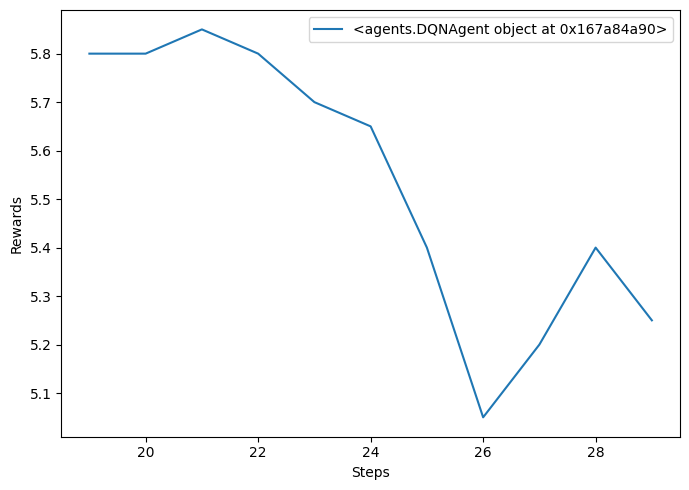

In [30]:
models_name=["DQN","Stoch_DQN","DDQN","Stoch_DDQN"]
one_plot_1(results["average_rewards"],DQN,20)

In [ ]:
models_name=["Random_model","Q_Learning_model","Stoch_Q_Learning_model","Double_Q_Learning_model","Stoch_Double_Q_Learning_model","Sarsa_model","Stoch_Sarsa_model"]

one_plot_1(results["average_acumulated_rewards"],models_name,1000)

In [ ]:
models_name=["Random_model","Q_Learning_model","Stoch_Q_Learning_model","Double_Q_Learning_model","Stoch_Double_Q_Learning_model","Sarsa_model","Stoch_Sarsa_model"]
avg_rewards=[]
avg_acu=[]
for name in models_name:
    avg_rewards.append(results[f"average_rewards_{name}"])
    avg_acu.append(results[f"average_acu_reward_{name}"])
results["average_rewards"]=avg_rewards
results["average_acumulated_rewards"]=avg_acu

In [ ]:
one_plot_1(results["average_acumulated_rewards"],models_name,1000)


In [ ]:
models_name=["Random_model","Q_Learning_model","Stoch_Q_Learning_model","Double_Q_Learning_model","Stoch_Double_Q_Learning_model","Sarsa_model","Stoch_Sarsa_model"]
results={}
for name in models_name:
    results[f"rewards_{name}"]=[]
    results[f"acu_rewards_{name}"]=[]
    results[f"episodes_length_{name}"]=[]
for i in range(10):
    print(f"step: {i}")
    Random_model=RandomAgent(args)

    Q_Learning_model=QLearningAgent(args)
    Stoch_Q_Learning_model=Stoch_QLearningAgent(args)

    Double_Q_Learning_model=DoubleQLearningAgent(args)
    Stoch_Double_Q_Learning_model=Stoch_DoubleQLearningAgent(args)

    Sarsa_model=SARSAAgent(args)
    Stoch_Sarsa_model=Stoch_SARSAAgent(args)

    models=[Random_model,Q_Learning_model,Stoch_Q_Learning_model,Double_Q_Learning_model,Stoch_Double_Q_Learning_model,Sarsa_model,Stoch_Sarsa_model]
    
    for model,name in zip(models,models_name):
        reward,acu_reward,length=model.train()
        results[f"rewards_{name}"].append(reward)
        results[f"acu_rewards_{name}"].append(acu_reward)
        results[f"episodes_length_{name}"].append(length)
        

for name in models_name:
    results[f"average_rewards_{name}"]=np.average(np.array(results[f"rewards_{name}"]),axis=0)
    results[f"average_acu_rewards_{name}"]=np.average(np.array(results[f"acu_rewards_{name}"]),axis=0)
avg_rewards=[]
avg_acu=[]

for name in models_name:
    avg_rewards.append(results[f"average_rewards_{name}"])
    avg_acu.append(results[f"average_acu_rewards_{name}"])
results["average_rewards"]=avg_acu
results["average_acumulated_rewards"]=avg_acu

In [ ]:
one_plot_1(avg_cum_rewards,models_name,1_000,y_name="Cumulative Rewards" ,title= "Cumulative Rewards for \"frozen lake\" env with C=3 and M=2" )

In [ ]:
one_plot_1(avg_acu,models_name,1000)

In [ ]:
length_of_episodes=[]
for name in models_name:
    length_for_model=[]
    for data in results[f"episodes-length_{name}"]:
        tmp=epi_length_convert(data)
        length_for_model.append(tmp)
    length_of_episodes.append(length_for_model)